In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def scalar_rotation(v, theta, phi):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    
    if abs(v[2]) > 1.0 - 1e-10:
        mux = sin_theta * cos_phi
        muy = sin_theta * sin_phi
        nuz = cos_theta * np.sign(v[2])
    else:
        denom = np.sqrt(1.0 - v[2]**2)
        mux = sin_theta * (v[0]*v[2]*cos_phi - v[1]*sin_phi) / denom + (v[0]*cos_theta)
        muy = sin_theta * (v[1]*v[2]*cos_phi + v[0]*sin_phi) / denom + (v[1]*cos_theta)
        nuz = -sin_theta * cos_phi * denom + (v[2]*cos_theta)

    return np.array([mux, muy, nuz])

def polarization_rotation(s, m, n, theta, phi):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    
    new_s = m * sin_theta * cos_phi + n * sin_theta * sin_phi + s * cos_theta
    new_m = m * cos_theta * cos_phi + n * cos_theta * sin_phi - s * sin_theta
    new_n = -1 * m * sin_phi + n * cos_phi
    
    return new_s, new_m, new_n

In [10]:
scatter_angle_theta = 29.4
scatter_angle_phi = 38.0

initial_direction = np.array([0.0, 0.0, 1.0])
initial_m = np.array([1.0, 0.0, 0.0])
initial_n = np.array([0.0, 1.0, 0.0])
initial_polarization = np.array([1.0, 0.0])

new_direction = scalar_rotation(initial_direction, np.radians(scatter_angle_theta), np.radians(scatter_angle_phi))
new_s, new_m, new_n = polarization_rotation(initial_direction, initial_m, initial_n, np.radians(scatter_angle_theta), np.radians(scatter_angle_phi))

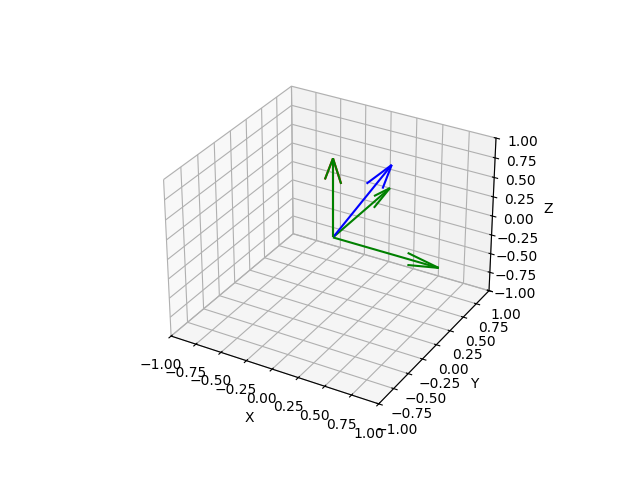

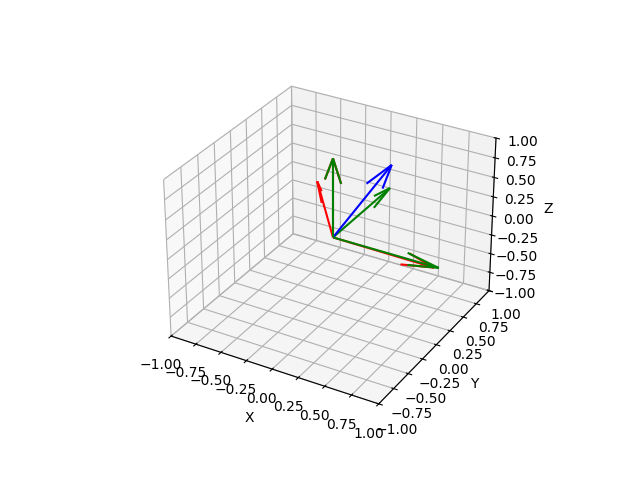

Initial Direction: [0. 0. 1.]
Scattered Direction scalar: [0.38683744 0.30223053 0.87121381]
Scattered Direction polarization: [0.38683744 0.30223053 0.87121381]


In [11]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, initial_direction[0], initial_direction[1], initial_direction[2], color='r', label='Initial Direction')
ax.quiver(0, 0, 0, new_direction[0], new_direction[1], new_direction[2], color='b', label='Scattered Direction')
ax.quiver(0, 0, 0, 0, 0, 1, color='g', label='Z Axis')
ax.quiver(0, 0, 0, 1, 0, 0, color='g', label='X Axis')
ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y Axis')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# %%

fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, initial_direction[0], initial_direction[1], initial_direction[2], color='r', label='Initial Direction')
ax.quiver(0, 0, 0, new_s[0], new_s[1], new_s[2], color='b', label='Scattered Direction')
ax.quiver(0, 0, 0, new_m[0], new_m[1], new_m[2], color='r', label='New M')
ax.quiver(0, 0, 0, new_n[0], new_n[1], new_n[2], color='r', label='New N')
ax.quiver(0, 0, 0, 0, 0, 1, color='g', label='Z Axis')
ax.quiver(0, 0, 0, 1, 0, 0, color='g', label='X Axis')
ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y Axis')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# %%

print("Initial Direction:", initial_direction)
print("Scattered Direction scalar:", new_direction)
print("Scattered Direction polarization:", new_s)



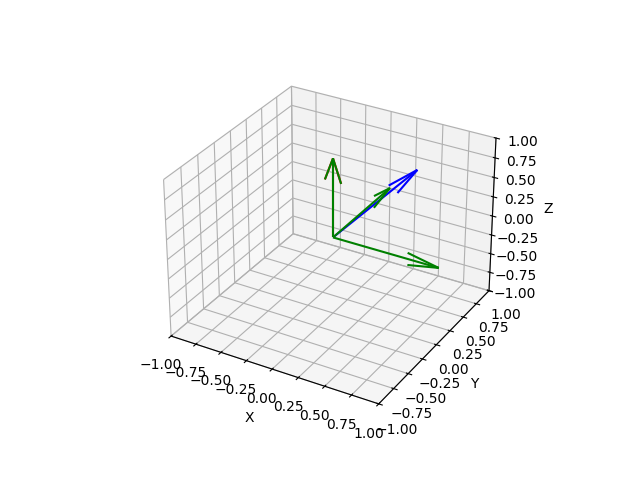

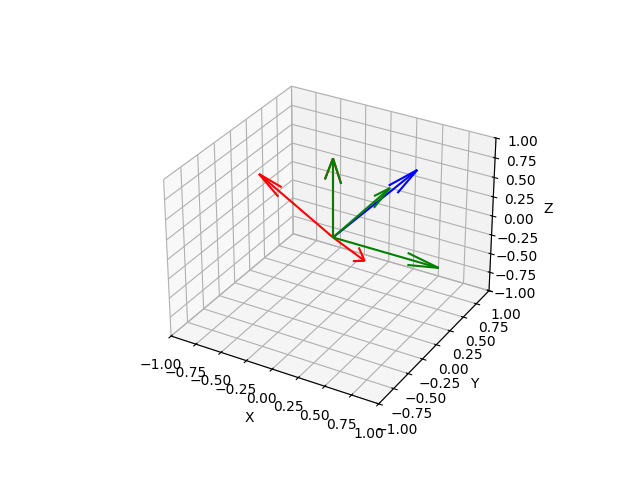

Initial Direction: [0. 0. 1.]
Scattered Direction scalar: [0.41652032 0.70895739 0.56911355]
Scattered Direction polarization: [0.41652032 0.70895739 0.56911355]


In [13]:
new_direction = scalar_rotation(new_direction, np.radians(scatter_angle_theta), np.radians(scatter_angle_phi))
new_s, new_m, new_n = polarization_rotation(new_s, new_m, new_n, np.radians(scatter_angle_theta), np.radians(scatter_angle_phi))

%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, initial_direction[0], initial_direction[1], initial_direction[2], color='r', label='Initial Direction')
ax.quiver(0, 0, 0, new_direction[0], new_direction[1], new_direction[2], color='b', label='Scattered Direction')
ax.quiver(0, 0, 0, 0, 0, 1, color='g', label='Z Axis')
ax.quiver(0, 0, 0, 1, 0, 0, color='g', label='X Axis')
ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y Axis')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# %%

fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, initial_direction[0], initial_direction[1], initial_direction[2], color='r', label='Initial Direction')
ax.quiver(0, 0, 0, new_s[0], new_s[1], new_s[2], color='b', label='Scattered Direction')
ax.quiver(0, 0, 0, new_m[0], new_m[1], new_m[2], color='r', label='New M')
ax.quiver(0, 0, 0, new_n[0], new_n[1], new_n[2], color='r', label='New N')
ax.quiver(0, 0, 0, 0, 0, 1, color='g', label='Z Axis')
ax.quiver(0, 0, 0, 1, 0, 0, color='g', label='X Axis')
ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y Axis')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# %%

print("Initial Direction:", initial_direction)
print("Scattered Direction scalar:", new_direction)
print("Scattered Direction polarization:", new_s)

